

Level-based clustering into:

🟥 Critical Nodes (Lowest influence)

🟨 Normal Nodes (Medium influence)

🟩 Maximum Influenced Nodes (Highest influence)

Edges in gray to distinguish message propagation

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv('/content/twitter_dataset.csv')

# Calculate influence score
df['Influence_Score'] = df['Retweets'] + df['Likes']

# Build directed graph
G = nx.DiGraph()

# Add nodes
for index, row in df.iterrows():
    G.add_node(row['Username'], influence=row['Influence_Score'])

# Generate edges efficiently (avoid O(n²) complexity)
df_sorted = df.sort_values(by="Influence_Score", ascending=False)
for i in range(len(df_sorted) - 1):
    G.add_edge(df_sorted.iloc[i]['Username'], df_sorted.iloc[i + 1]['Username'])

# Depth First Search for Message Propagation
def dfs_routing(graph, start):
    visited = set()
    stack = [start]
    propagation_path = []
    while stack:
        node = stack.pop()
        if node not in visited:
            visited.add(node)
            propagation_path.append(node)
            stack.extend(set(graph.neighbors(node)) - visited)
    return propagation_path

# Compute propagation length
propagation_results = {node: len(dfs_routing(G, node)) for node in G.nodes()}

# Apply Level Clustering (Naive-GCA)
influence_scores = np.array(list(propagation_results.values())).reshape(-1, 1)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42).fit(influence_scores)
cluster_labels = kmeans.labels_

# Categorizing nodes
categories = {0: 'Critical Nodes', 1: 'Normal Nodes', 2: 'Maximum Influenced Nodes'}
clustered_nodes = {category: [] for category in categories.values()}

for node, label in zip(G.nodes(), cluster_labels):
    clustered_nodes[categories[label]].append(node)

# Output results
print("Clustered Nodes:")
for category, nodes in clustered_nodes.items():
    print(f"{category}: {nodes}")


Clustered Nodes:
Critical Nodes: ['julie81', 'richardhester', 'williamsjoseph', 'danielsmary', 'carlwarren', 'ramirezmikayla', 'fieldsbrian', 'jgood', 'turneredgar', 'audreymooney', 'timothyhardy', 'qdavis', 'davidgarcia', 'timothy70', 'bettyperry', 'ujohnson', 'ashleymartinez', 'murphyrachel', 'theresagonzales', 'david30', 'gellis', 'aaronhatfield', 'justin91', 'browntara', 'kelsey36', 'greyes', 'knightcynthia', 'longdesiree', 'mollymartinez', 'malonekatie', 'davidalvarez', 'hdunn', 'johndean', 'philip97', 'dana34', 'qestes', 'lisa00', 'toddjohnson', 'imoore', 'lduarte', 'jonathanmeyer', 'michael75', 'sherry41', 'holson', 'wberry', 'karenhernandez', 'ronald32', 'teresa28', 'solomonalicia', 'greenesteven', 'ujones', 'tracey51', 'tyler64', 'whitneyarnold', 'sweeneyjose', 'morrowloretta', 'julia48', 'nking', 'dawn47', 'hhardy', 'jilliandavis', 'gwashington', 'foxmichael', 'mgillespie', 'ibrown', 'anagardner', 'zlewis', 'beverlystewart', 'stephencarter', 'mallory62', 'hgreen', 'tamara88',

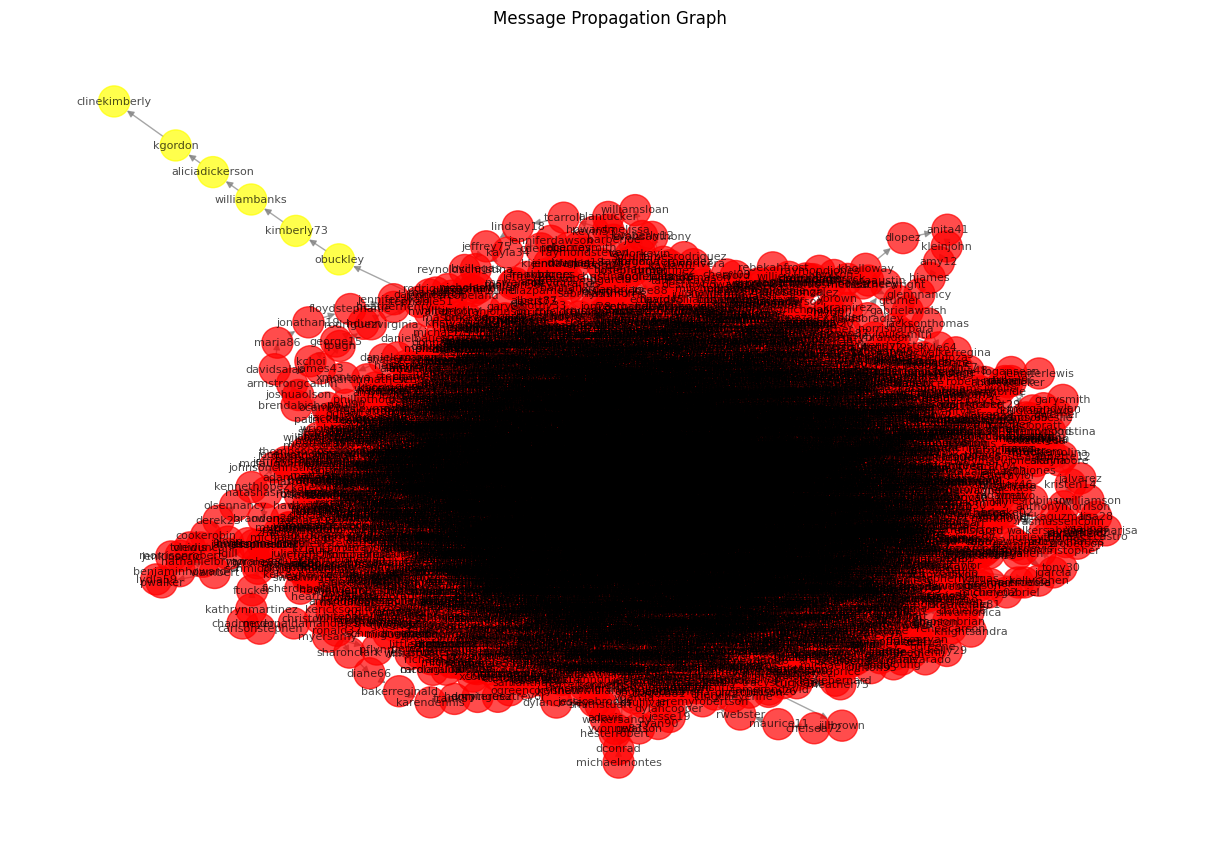

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv('/content/twitter_dataset.csv')

# Calculate influence score
df['Influence_Score'] = df['Retweets'] + df['Likes']

# Build directed graph
G = nx.DiGraph()

# Add nodes
for index, row in df.iterrows():
    G.add_node(row['Username'], influence=row['Influence_Score'])

# Generate edges efficiently (avoid O(n²) complexity)
df_sorted = df.sort_values(by="Influence_Score", ascending=False)
for i in range(len(df_sorted) - 1):
    G.add_edge(df_sorted.iloc[i]['Username'], df_sorted.iloc[i + 1]['Username'])

# Depth First Search for Message Propagation
def dfs_routing(graph, start):
    visited = set()
    stack = [start]
    propagation_path = []
    while stack:
        node = stack.pop()
        if node not in visited:
            visited.add(node)
            propagation_path.append(node)
            stack.extend(set(graph.neighbors(node)) - visited)
    return propagation_path

# Compute propagation length
propagation_results = {node: len(dfs_routing(G, node)) for node in G.nodes()}

# Apply Level Clustering (Naive-GCA)
influence_scores = np.array(list(propagation_results.values())).reshape(-1, 1)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42).fit(influence_scores)
cluster_labels = kmeans.labels_

# Categorizing nodes
categories = {0: 'Critical Nodes', 1: 'Normal Nodes', 2: 'Maximum Influenced Nodes'}
clustered_nodes = {category: [] for category in categories.values()}

for node, label in zip(G.nodes(), cluster_labels):
    clustered_nodes[categories[label]].append(node)

# Visualizing the graph
plt.figure(figsize=(12, 8))

# Position nodes using the spring layout
pos = nx.spring_layout(G, seed=42)

# Assign colors based on cluster
color_map = []
for node in G.nodes():
    if node in clustered_nodes['Critical Nodes']:
        color_map.append('red')
    elif node in clustered_nodes['Normal Nodes']:
        color_map.append('yellow')
    else:
        color_map.append('green')

# Draw the graph
nx.draw(G, pos, node_color=color_map, with_labels=True, font_size=8, node_size=500, edge_color="gray", alpha=0.7)

# Show plot
plt.title("Message Propagation Graph")
plt.show()
